In [66]:
import pandas as pd
import numpy as np
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [11]:
chrr_samples = pd.read_csv('CHRR_samples_TIC_rxns_LG_TOCS_m2.csv')
tof_samples = pd.read_csv('TOF_samples_TIC_rxns_LG_TOCS_m2.csv')

In [12]:
rxns = chrr_samples.columns
nRxns = len(rxns)
print(rxns)

Index(['ABUTt2pp', 'ADK1', 'ADK3', 'ALAt2pp_copy2', 'ALAt4pp', 'CAt6pp',
       'CA2t3pp', 'GLUABUTt7pp', 'GLUt2rpp', 'GLUt4pp', 'GLYCLTt2rpp',
       'GLYCLTt4pp', 'GLYt2pp_copy2', 'GLYt4pp', 'NAt3pp', 'NDPK1', 'SERt2rpp',
       'SERt4pp'],
      dtype='object')


In [18]:
nRxns

18

c:\Users\rxpav\anaconda3\envs\MOMI\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


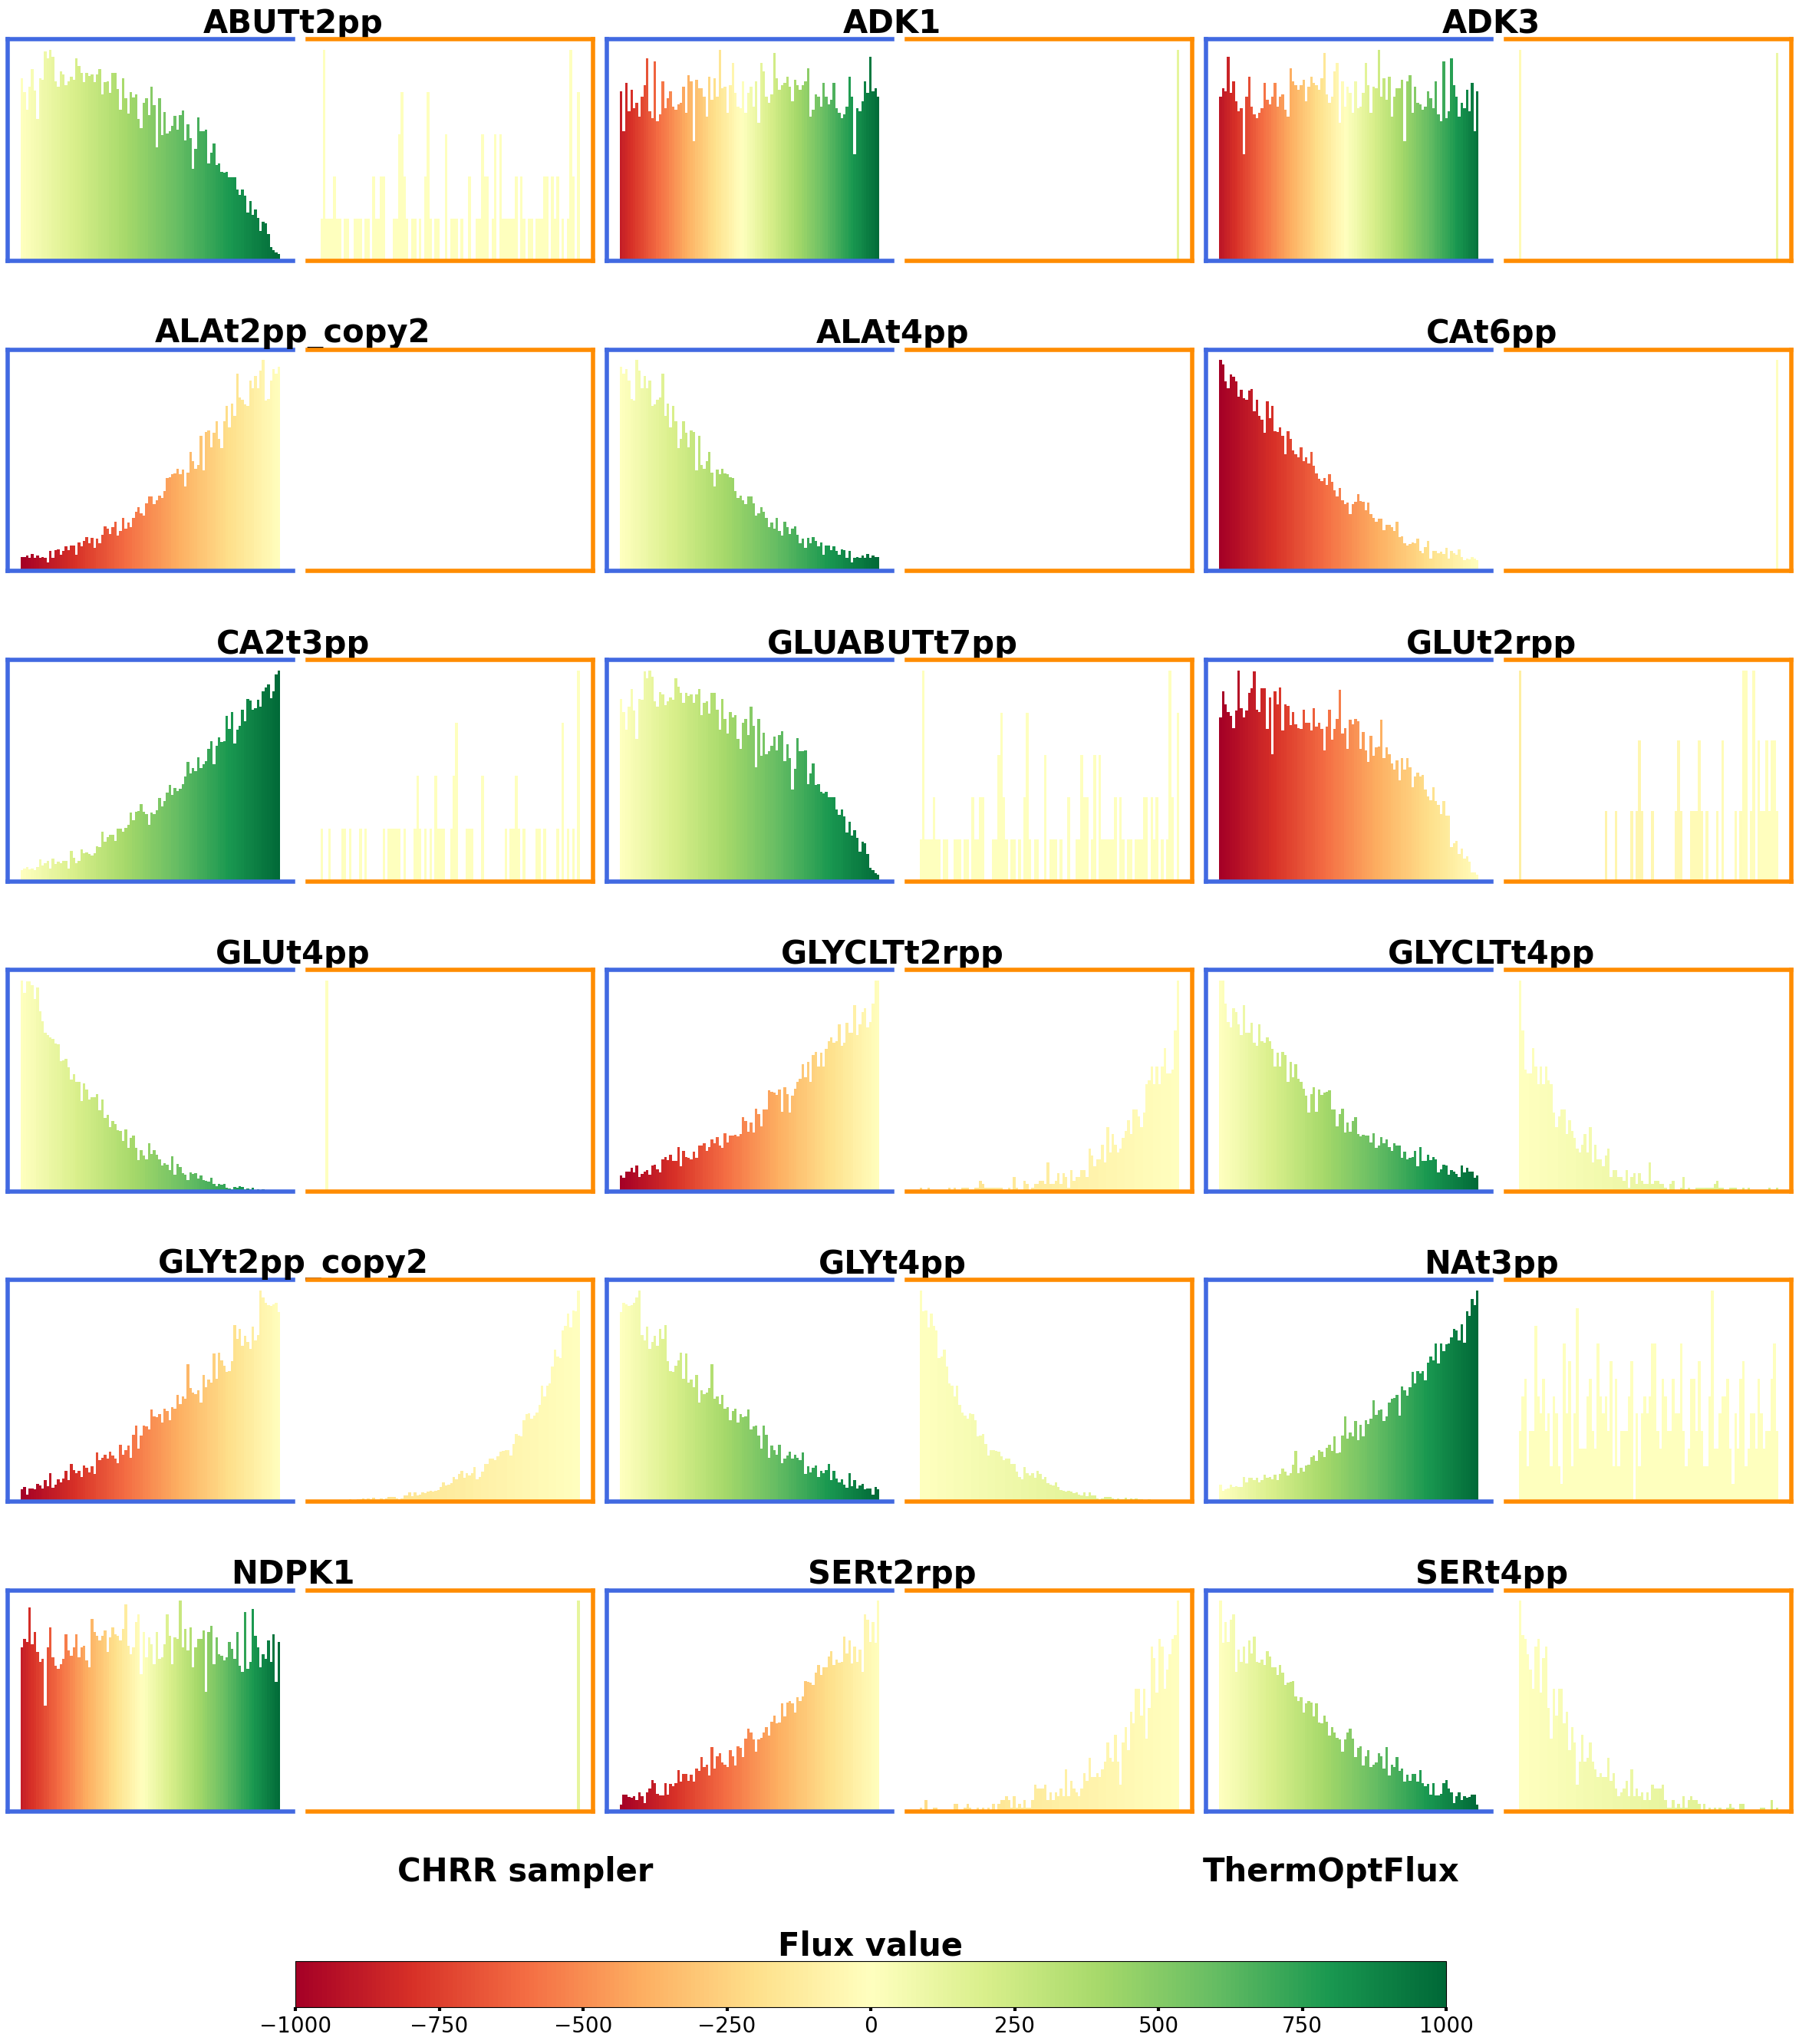

In [105]:
fig,axes = plt.subplots(6,6,figsize=(30,30))
fig.subplots_adjust(wspace=0.05,hspace=0.4)
axes = axes.ravel()
# Define a colormap (adjust as needed)
cmap = plt.get_cmap('RdYlGn')
for i in range(len(rxns)):
    rxn = rxns[i]
    chrr_sample = chrr_samples[rxn]
    tof_sample = tof_samples[rxn]
    chrr_sample = chrr_sample[np.abs(chrr_sample)>1e-8]
    tof_sample = tof_sample[np.abs(tof_sample)>1e-8]
    ax_id = i*2

    ax1 = axes[ax_id]
    ax1.hist(chrr_sample,bins=100,density=True,color='white')
    patches = ax1.patches
    x_ticks = [patch.get_xy()[0] for patch in patches]
    # Color the bars based on their x-axis position
    for i, patch in enumerate(patches):
        color = cmap((x_ticks[i] +1000)/(2000))
        patch.set_facecolor(color)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_title(rxn,x=1,fontdict={'fontsize':30,'weight':'bold'})

    ax2 = axes[ax_id+1]
    ax2.hist(tof_sample, bins=100,density=True,color='white')
    patches = ax2.patches
    x_ticks = [patch.get_xy()[0] for patch in patches]
    # Color the bars based on their x-axis position
    for i, patch in enumerate(patches):
        color = cmap((x_ticks[i] +1000)/(2000))
        patch.set_facecolor(color)
    ax2.set_yticks([])
    ax2.set_xticks([])
    # setting the spines off
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    for spine in ax2.spines.values():
        spine.set_edgecolor('darkorange')
        spine.set_linewidth(4) 
    for spine in ax1.spines.values():
        spine.set_edgecolor('royalblue')
        spine.set_linewidth(4) 
# for i in range(3):
#     axes[-1-i*2].set_xlabel('ThermOptFlux',fontdict={'fontsize':30,'weight':'bold'})
#     axes[-2-i*2].set_xlabel('CHRR',fontdict={'fontsize':30,'weight':'bold'})
#     axes[-1-i*2].xaxis.set_label_coords(0.5, -0.1)
#     axes[-2-i*2].xaxis.set_label_coords(0.5, -0.1)
norm = colors.Normalize(vmin=-1000, vmax=1000)  # Adjust vmin and vmax as needed
scalar_mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
cax = plt.axes([0.25, 0.025, 0.5, 0.02])  # Adjust position and size as needed
cbr = plt.colorbar(scalar_mappable,cax=cax,orientation='horizontal')
cbr.set_label('Flux value', labelpad=-100,fontsize=30,fontweight='bold')
cbr.ax.tick_params(labelsize=20,width=3)
# writing text below the plot
fig.text(0.35, 0.08, 'CHRR sampler', ha='center',fontsize=30,fontweight='bold')
fig.text(0.7, 0.08, 'ThermOptFlux', ha='center',fontsize=30,fontweight='bold')

plt.savefig('sampling.pdf',bbox_inches='tight')
plt.show()